In [1]:
import drrdTools as dr
import numpy as np

In [2]:
# Information for the raw data file name. Tipically the file
# names are PPPNNN.SSS, where PPP are three digits for the
# prefix (ex. AB1) reflecting the experiment; NNN are the 
# three digits for the animal ID, (064 if animal is 64); and 
# SSS are the three digits for the session (001 for session 1). 
# Example of a filename: AB1064.001
prefix= 'AB1'
animalID= 65
session = 2

# modify the line reflect to your data path
dataPath = '/home/mbreyes/ufabc/dados/AB/data/raw/AB1/'

________________________________________________________________________________
846
846
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Successfully fixed
[1.2]
Rat64  Trials:846  Reinforced:237  Non-Reinforced:607  Invalid:2



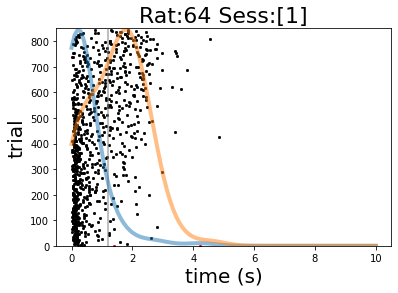

In [3]:
# Extract the data from a file and plot the response during the session
D = dr.drrd(prefix= 'AB1', animalID= 64, sessions = 1, dataPath = dataPath)

________________________________________________________________________________
460
460
________________________________________________________________________________
Rat65  Trials:460  Reinforced:286  Non-Reinforced:173  Invalid:1



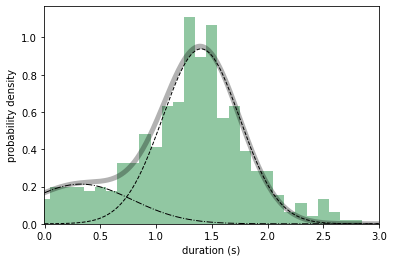

In [4]:
# Example of how to fit a double gaussian
pars = dr.fit_single_animal(animalID,session,plotFlag=True,indexes=(None,None),ax=None, prefix='AB1', dataPath= dataPath)